# Example of Swap Test

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
sys.path

['/home/jacob/miniconda3/envs/pl-040/lib/python311.zip',
 '/home/jacob/miniconda3/envs/pl-040/lib/python3.11',
 '/home/jacob/miniconda3/envs/pl-040/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/pl-040/lib/python3.11/site-packages',
 '.',
 '..']

In [2]:
import pennylane as qml
from pennylane import numpy as np
from qae_utils.Tools import draw_circuit

In [3]:
### Swap test
#   data_wires: wires with data to be tested
#   comp_wires: wires with data to be compared against
#   test_wire: measured wire
def swap_test(data_wires, comp_wires, test_wire):
    n_wires = range(len(data_wires)+len(comp_wires) + 1)
    n_aux_wire = len(data_wires)+len(comp_wires)
    
    qml.Hadamard(test_wire)
    for i in range(len(data_wires)):
        qml.CSWAP([test_wire, data_wires[i], comp_wires[i]])    
    qml.Hadamard(test_wire)

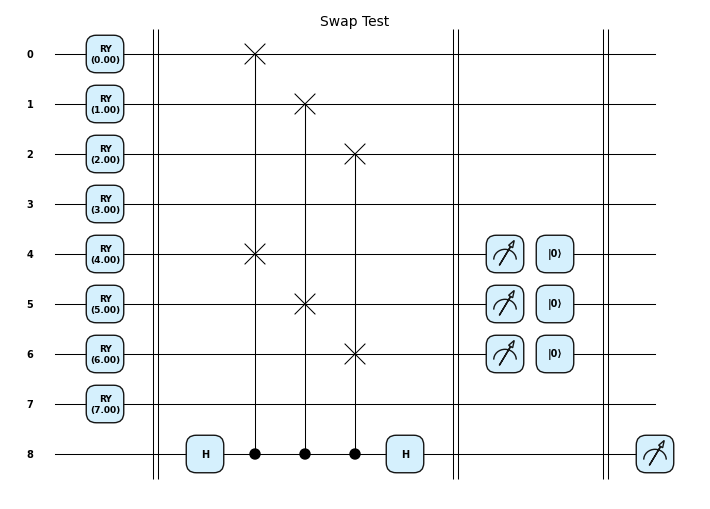

In [4]:
### Swap test wrapper
def test_swap_test(data_wires, comp_wires, test_wire):
    for w in range(0, test_wire): qml.RY(w, w)
    qml.Barrier(data_wires+comp_wires+[test_wire])
    swap_test(data_wires, comp_wires, test_wire)
    qml.Barrier(data_wires+comp_wires+[test_wire])
    for w in comp_wires: qml.measure(w, reset=True)
    qml.Barrier(data_wires+comp_wires+[test_wire])
    return qml.probs(wires=test_wire)
    
### Testing swap test
shots = 1
n_wires = 9
data_wires = [0, 1, 2]
trash_wires = [4, 5, 6]
aux_wire = 8

dev = qml.device('lightning.qubit', wires=n_wires, shots=shots)

swap_qc = qml.QNode(test_swap_test, dev, interface='torch')
draw_circuit(swap_qc, scale=0.5, title='Swap Test', level='gradient') \
    (data_wires, trash_wires, aux_wire) # expansion_strategy='device'/'gradient'

# Software in use

In [5]:
!pip list | grep -E 'PennyLane'

PennyLane                 0.40.0
PennyLane_Lightning       0.40.0
PennyLane-qiskit          0.40.0
